<a href="https://colab.research.google.com/github/Bandi-krupa-Bhavani/AIML-2024-25/blob/main/COURSE_PROJECT_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SONG LYRICS GENERATOR USING AI**



**IMPORT THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

**IMPORT THE DATASET**

In [2]:
df=pd.read_csv('/content/song_lyrics.csv')

In [3]:
df.head()

,SongID,Song Name,Lyricists,Music_Director,Singer,Year,movie_name,location,popularity
0,25,Meetha Sa,Irshad Kamil,Pritam,Anupam Amod,2010,Bounty,Alaska,8
1,18,Meetha Sa,Virag Mishra,Pritam,Sunidhi Chauhan,2010,Bounty,Alaska,8
2,16,Meetha Sa,Virag Mishra,Pritam,Kailash Kher,2010,Bounty,Alaska,8
3,19,Meetha Sa,Virag Mishra,Pritam,Shreya Ghoshal,2010,Bounty,Alaska,8
4,20,Meetha Sa,Virag Mishra,Pritam,Shaan,2010,Bounty,Alaska,8


In [4]:
df.info

<bound method DataFrame.info of      SongID  Song Name       Lyricists Music_Director            Singer  Year  \
0        25  Meetha Sa    Irshad Kamil         Pritam       Anupam Amod  2010   
1        18  Meetha Sa    Virag Mishra         Pritam   Sunidhi Chauhan  2010   
2        16  Meetha Sa    Virag Mishra         Pritam      Kailash Kher  2010   
3        19  Meetha Sa    Virag Mishra         Pritam    Shreya Ghoshal  2010   
4        20  Meetha Sa    Virag Mishra         Pritam             Shaan  2010   
..      ...        ...             ...            ...               ...   ...   
564     853  Dil Kashi     Faaiz Anwar        Shankar             Sajid  2012   
565     845  Dil Kashi   Neelesh Misra        Shankar  Sukhwinder Singh  2012   
566     860  Dil Kashi          Kumaar        Shankar        Sonu Nigam  2012   
567     854  Dil Kashi   Sameer Anjaan        Shankar        Mika Singh  2012   
568     849  Dil Kashi  Sanjay Masoomm        Shankar                KK  2012   

    movie_name location  popularity  
0       Bounty   Alaska           8  
1       Bounty   Alaska           8  
2       Bounty   Alaska           8  
3       Bounty   Alaska           8  
4       Bounty   Alaska           8  
..         ...      ...         ...  
564   No mercy     Lowa           5  
565   No mercy     Lowa           5  
566   No mercy     Lowa           5  
567   No mercy     Lowa           5  
568   No mercy     Lowa           5  

[569 rows x 9 columns]>

**SPLITTING DATA INTO TRAINING AND TEST SETS**

In [5]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(df,test_size=0.3,random_state=20)
print('The size of traning data is;{} \n The size of testing data is:{}'.format(len(train_data),len(test_data)))

The size of traning data is;398 
 The size of testing data is:171


**CHECKING SUMMARY STATISTICS**

In [6]:
train_data.describe()

,SongID,Year,popularity
count,398.000000,398.000000,398.000000
mean,483.434673,2009.070352,7.462312
std,274.669849,4.441058,1.606767
min,17.000000,1970.000000,5.000000
25%,176.250000,2009.000000,6.000000
50%,576.500000,2010.000000,7.000000
75%,713.750000,2011.000000,9.000000
max,854.000000,2012.000000,10.000000


**CHECKING MISSING VALUES**

In [7]:
#checking missing values
train_data.isnull().sum()

SongID            0
Song Name         0
Lyricists         0
Music_Director    0
Singer            0
Year              0
movie_name        0
location          0
popularity        0
dtype: int64

**EXPLORATORY ANALYSIS OF DATAFRAME**

**CHECKING CATEGORICAL FEATURES**

**Let's inspect some categorical features that are in the dataset.**

In [8]:
train_data['Song Name'].value_counts()

Song Name
Dil Kashi               136
Meetha Sa               112
Oye Paape Ek Peg De      58
Pyar Itna Na Kar         49
Zaraa Maara Maara Sa     43
Name: count, dtype: int64

<Axes: xlabel='Song Name', ylabel='count'>

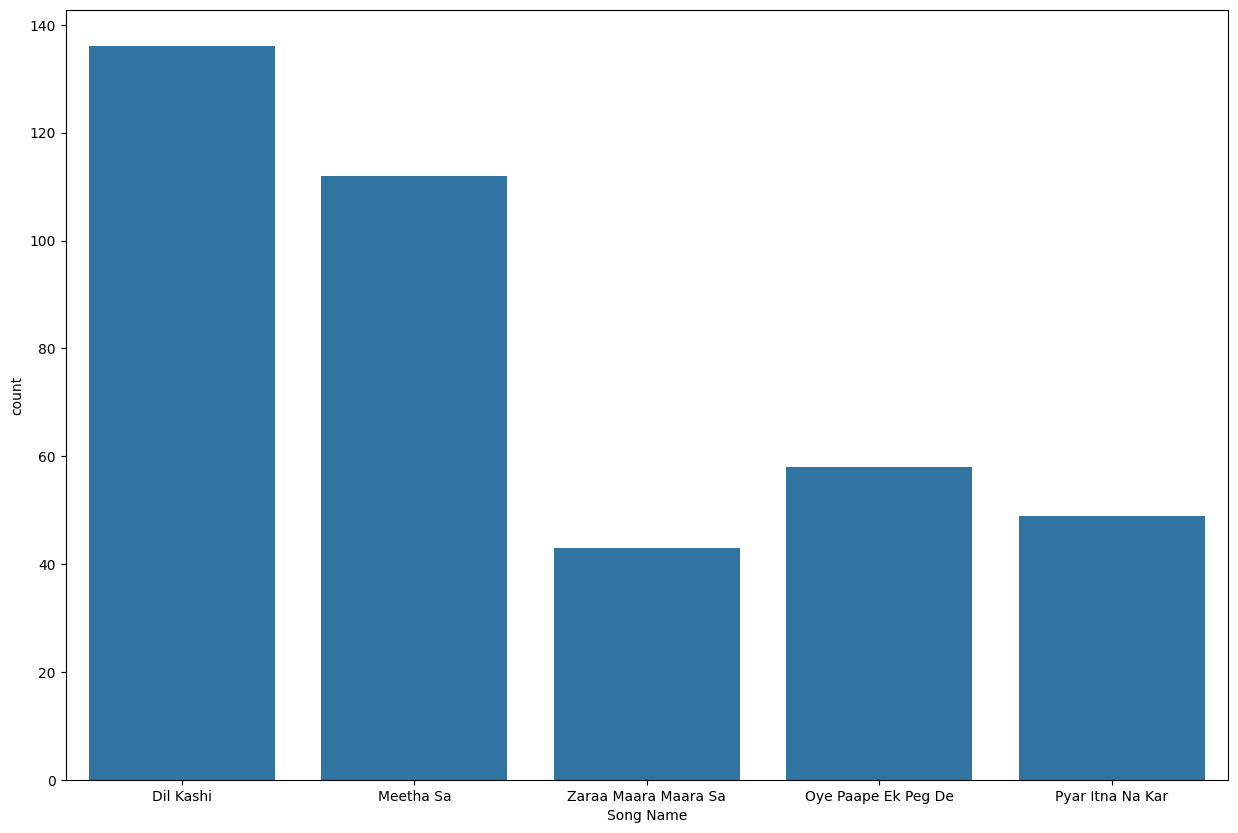

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='Song Name')
#from the below graph,the song name 'dil kashi' has the highest count compared to other song names.

<Axes: xlabel='Song Name', ylabel='count'>

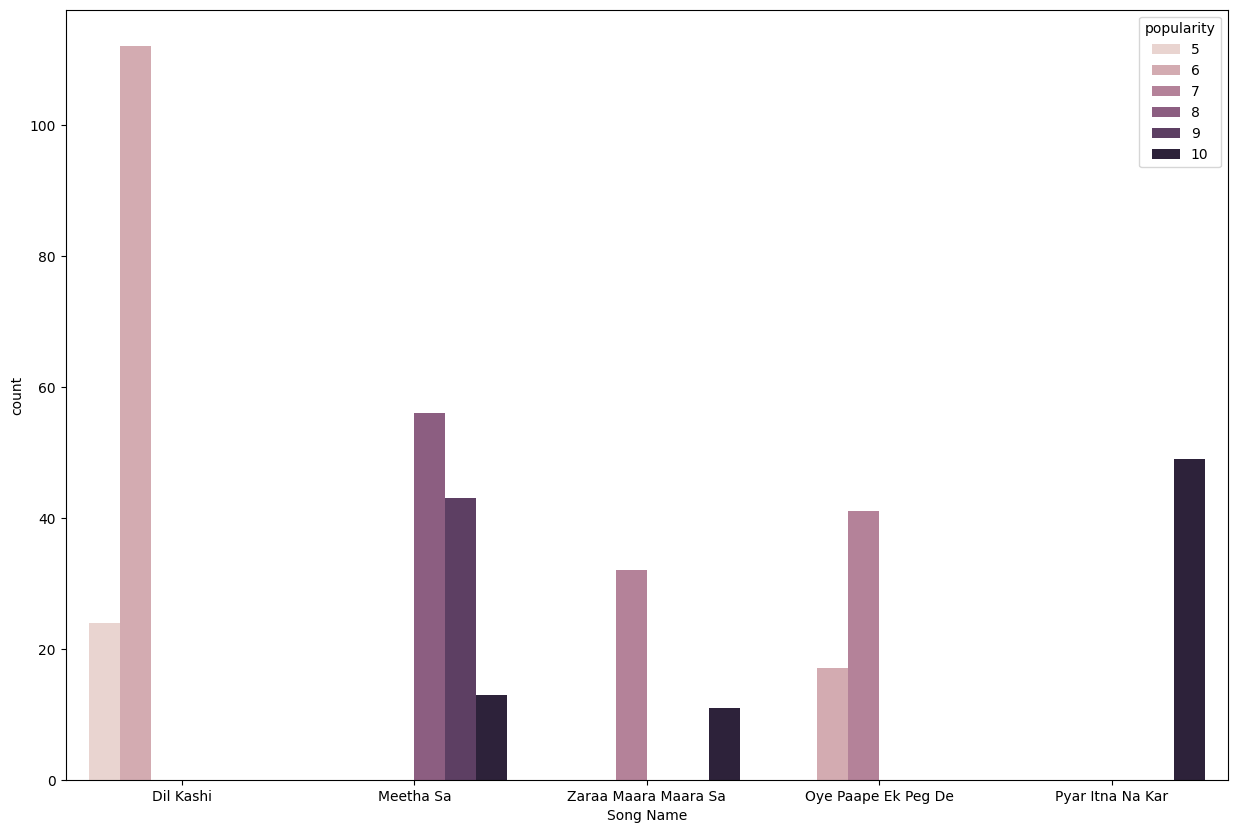

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='Song Name', hue='popularity')
#from the below graph,the popularity changes from song to song and the popularity 6 has highest count among them.

In [11]:
train_data['Music_Director'].value_counts()

Music_Director
Pritam           129
Raeth             76
Sonu Nigam        70
Shankar           63
A R Rahman        32
Mohit Chauhan     28
Name: count, dtype: int64

<Axes: xlabel='Music_Director', ylabel='count'>

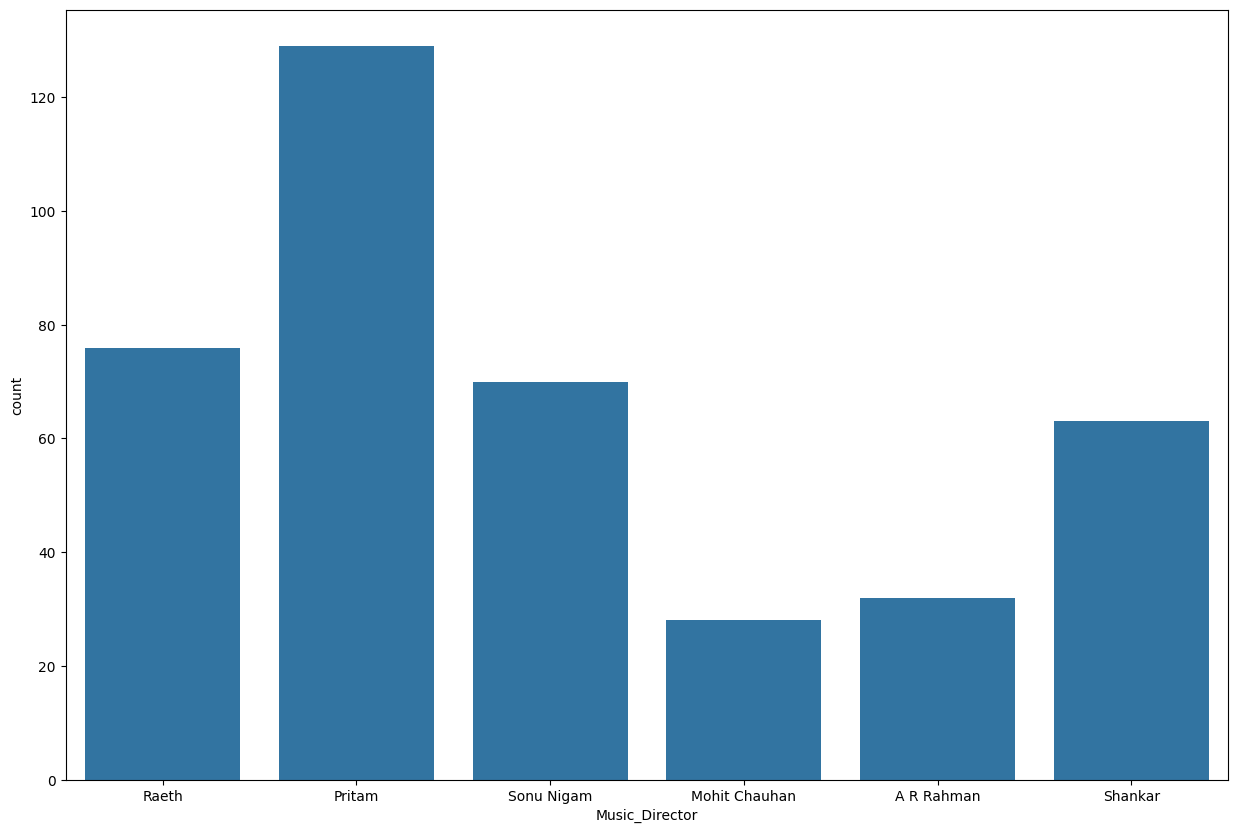

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='Music_Director')
#from the below graph,the Music director 'Pritam' has the highest count compared to other Music directors.

<Axes: xlabel='Music_Director', ylabel='count'>

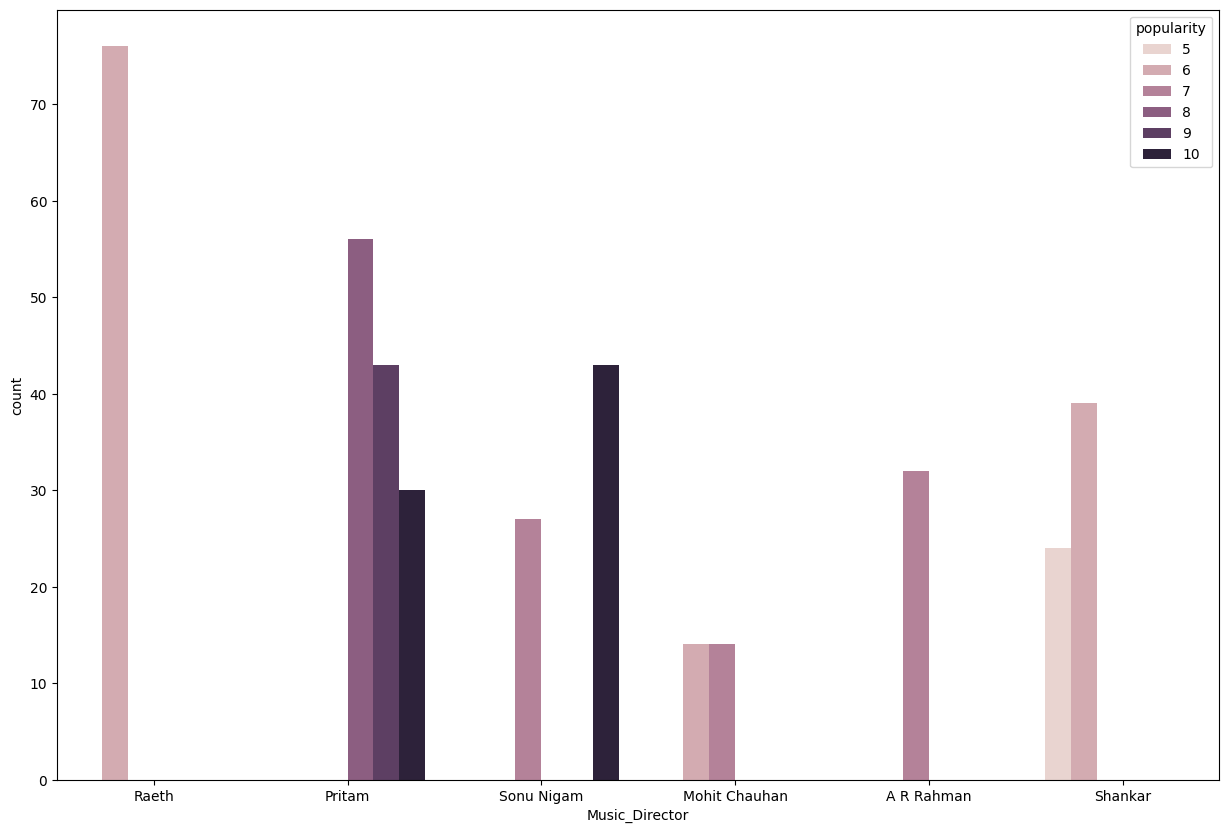

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='Music_Director', hue='popularity')
#from the below graph,the popularity at the music director pritam is more compared to others.

In [13]:
train_data['Year'].value_counts()

Year
2010    110
2011     89
2012     84
2007     30
2009     26
2005     16
2006     14
1996      8
1998      7
1997      5
2003      4
2008      3
1970      2
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

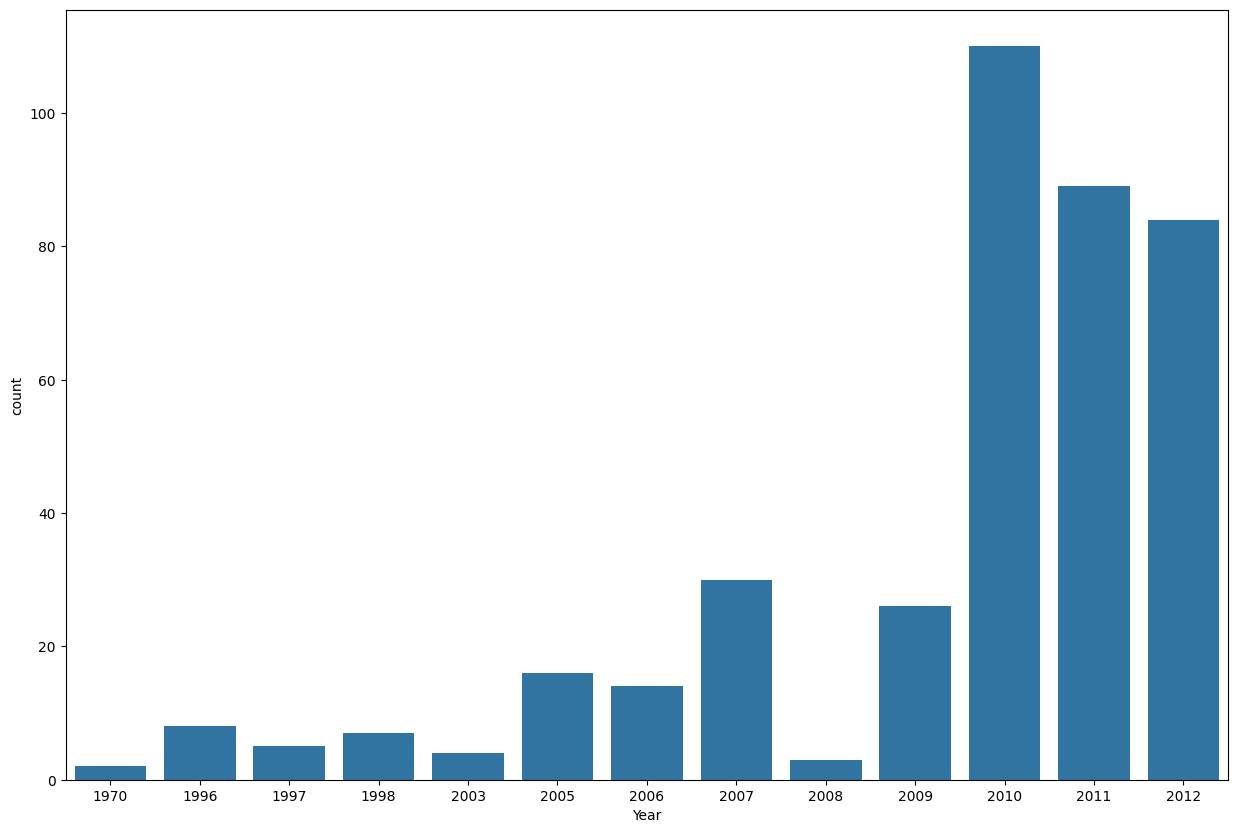

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='Year')
#from the below graph,the year '2010' has the highest count compared to other years.

<Axes: xlabel='Year', ylabel='count'>

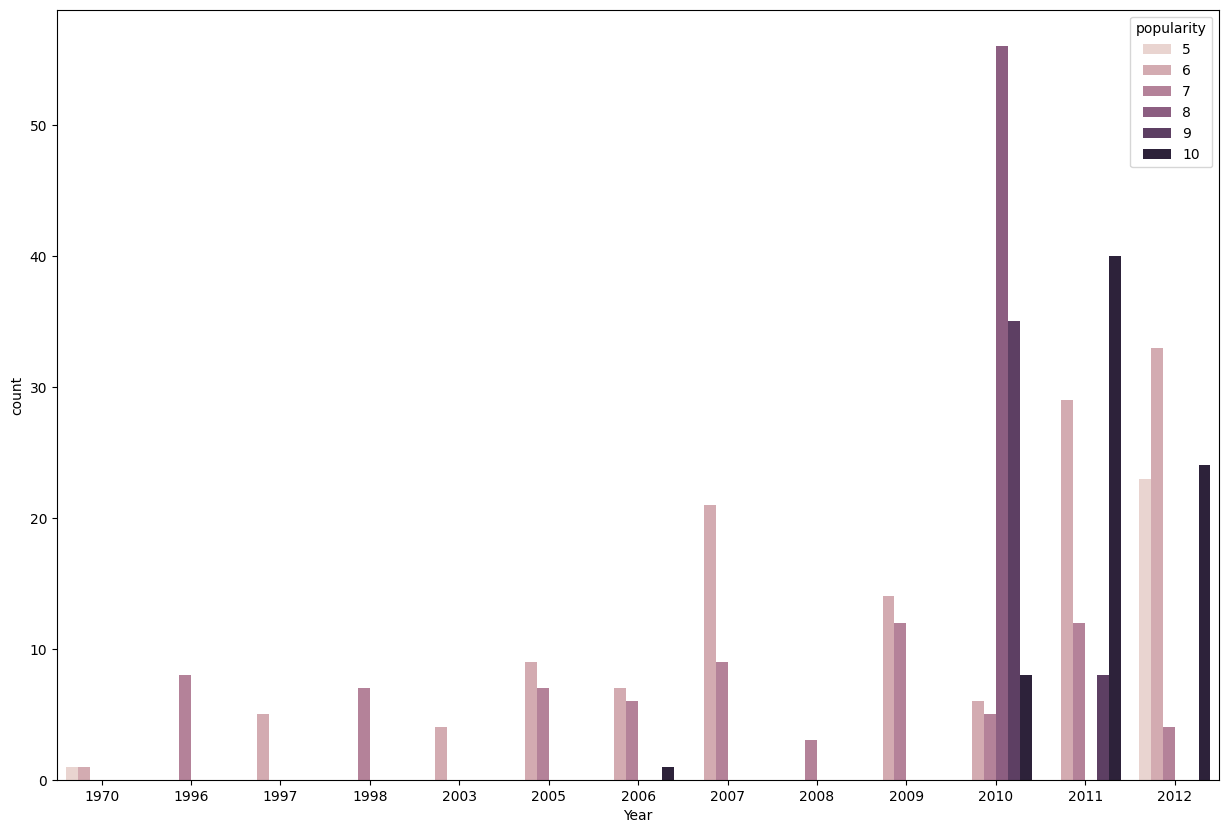

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='Year', hue='popularity')
#from the below graph,the ppularity drastically increases from the year 2010 to 2012.

In [16]:
train_data['movie_name'].value_counts()

movie_name
White tiger     107
A separation    103
Bounty           61
Black water      45
Gold eyes        39
No mercy         36
Drive my car      7
Name: count, dtype: int64

<Axes: xlabel='movie_name', ylabel='count'>

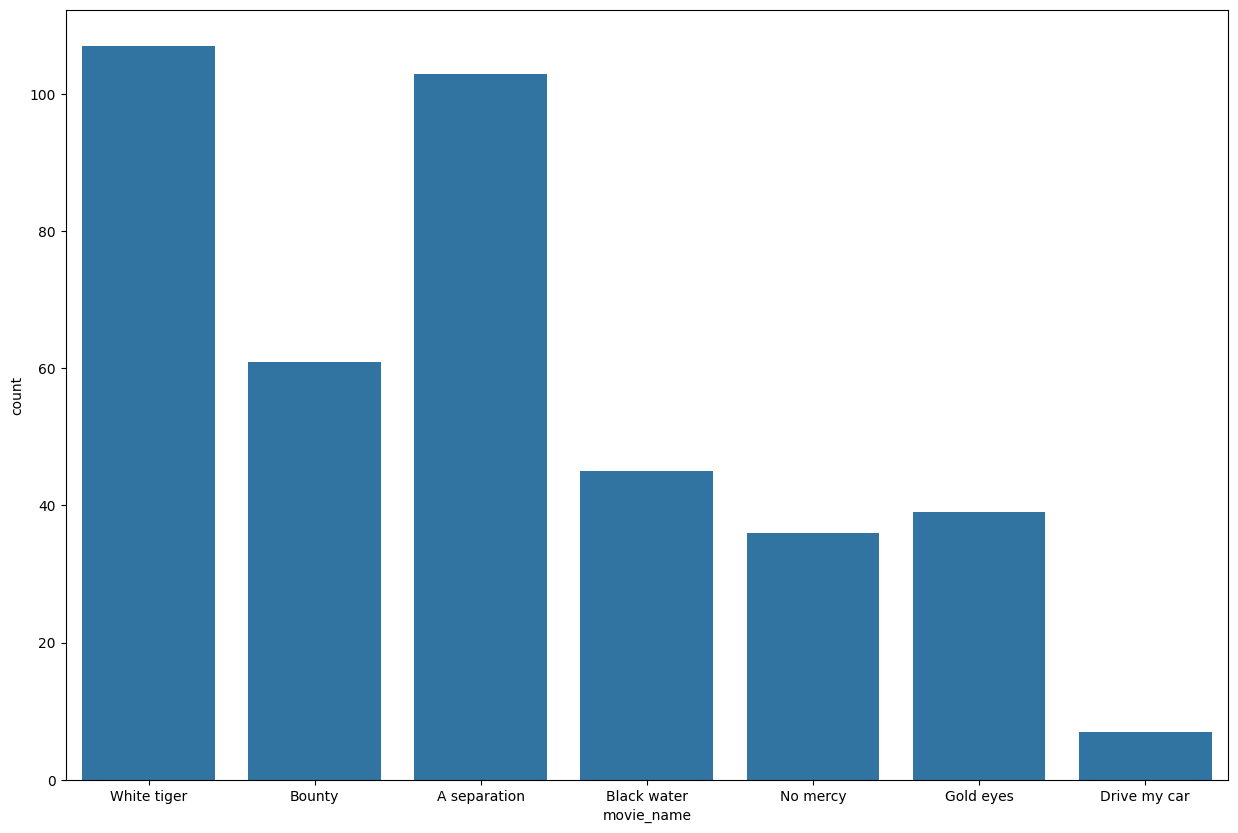

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='movie_name')
#from the below graph,the movie name 'white tiger' has the highest count compared to other movie names.

<Axes: xlabel='movie_name', ylabel='count'>

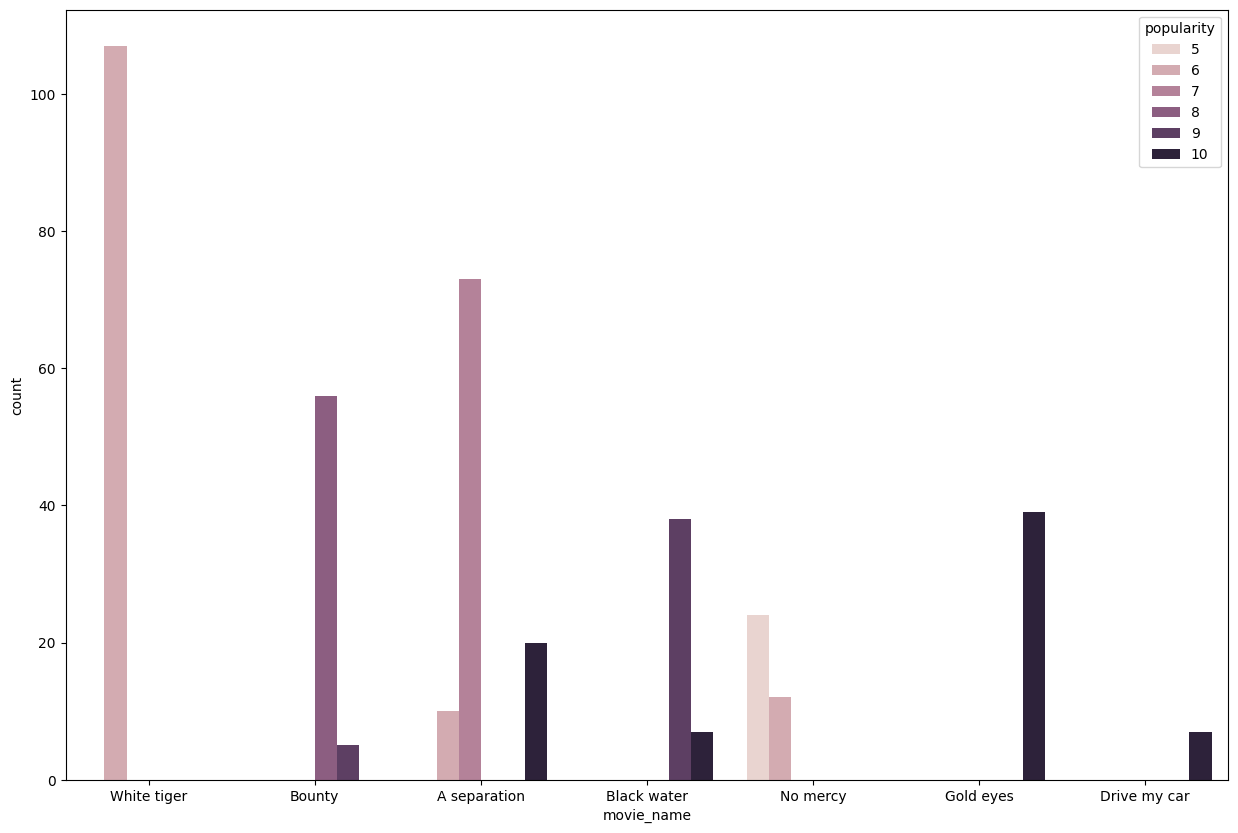

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='movie_name', hue='popularity')
#from the below graph,the popularity with in the movie name is less compared to other columns.

In [18]:
train_data['location'].value_counts()

location
Georgia       84
Nevada        71
Alaska        61
Oregon        55
Texas         45
Montana       39
Lowa          36
California     7
Name: count, dtype: int64

<Axes: xlabel='location', ylabel='count'>

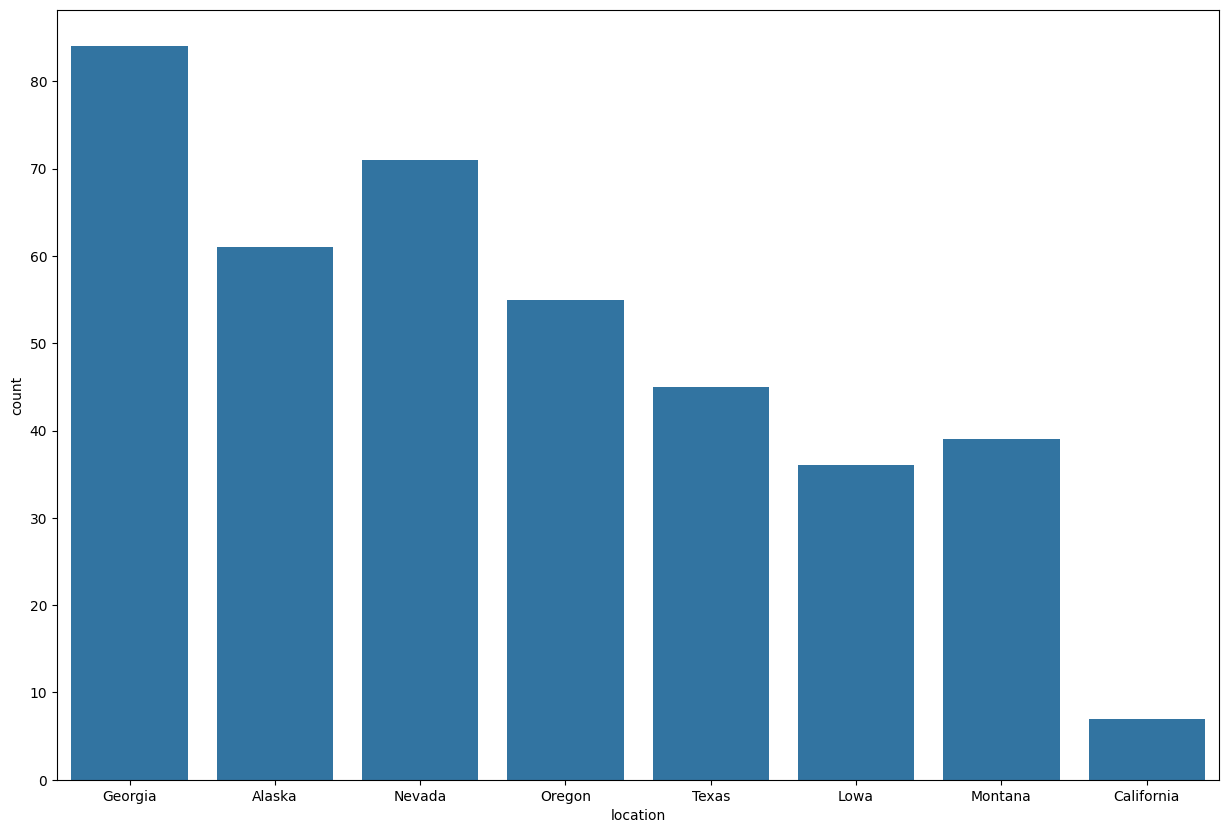

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='location')
#from the below graph,the location 'georgia' has the highest count compared to other locations.

<Axes: xlabel='location', ylabel='count'>

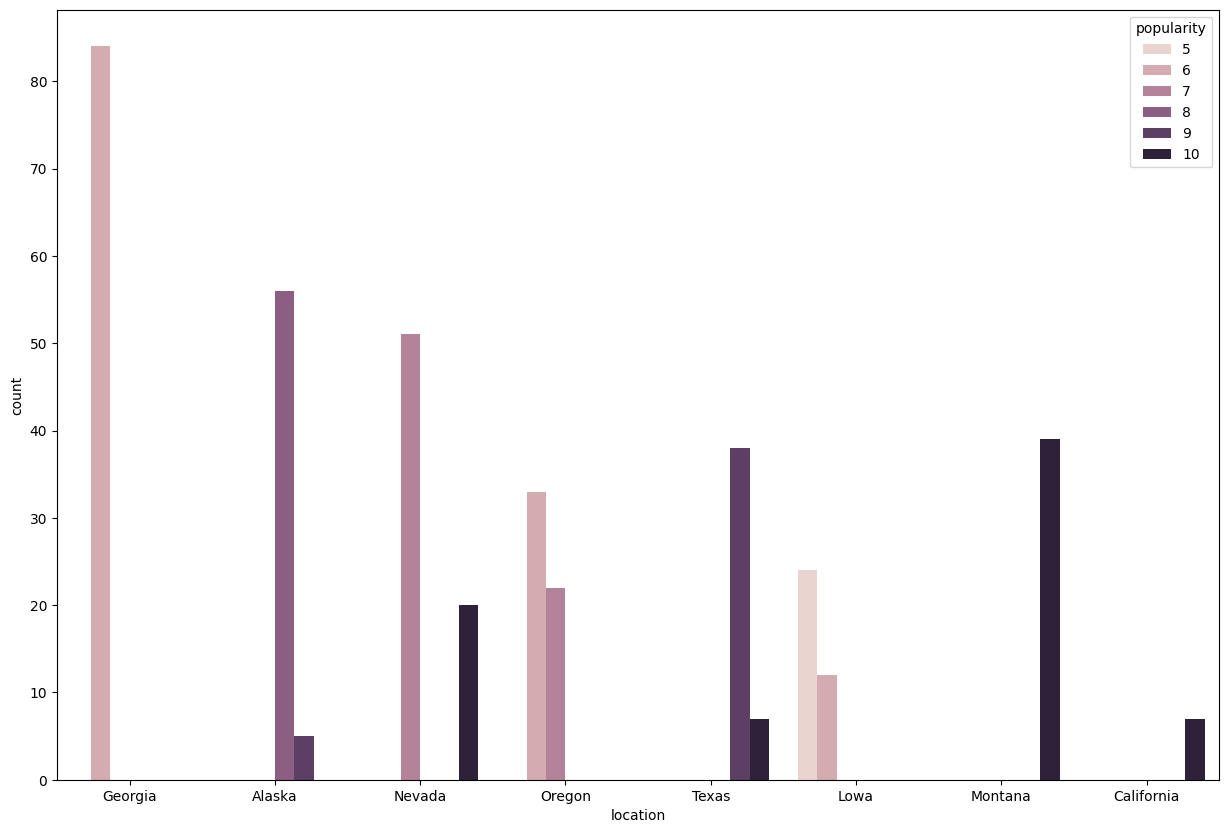

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='location', hue='popularity')
#from the below graph,the popularity in the city Alaska has the highest popularity.

In [21]:
train_data['popularity'].value_counts()

popularity
6     129
7      73
10     73
8      56
9      43
5      24
Name: count, dtype: int64

<Axes: xlabel='popularity', ylabel='count'>

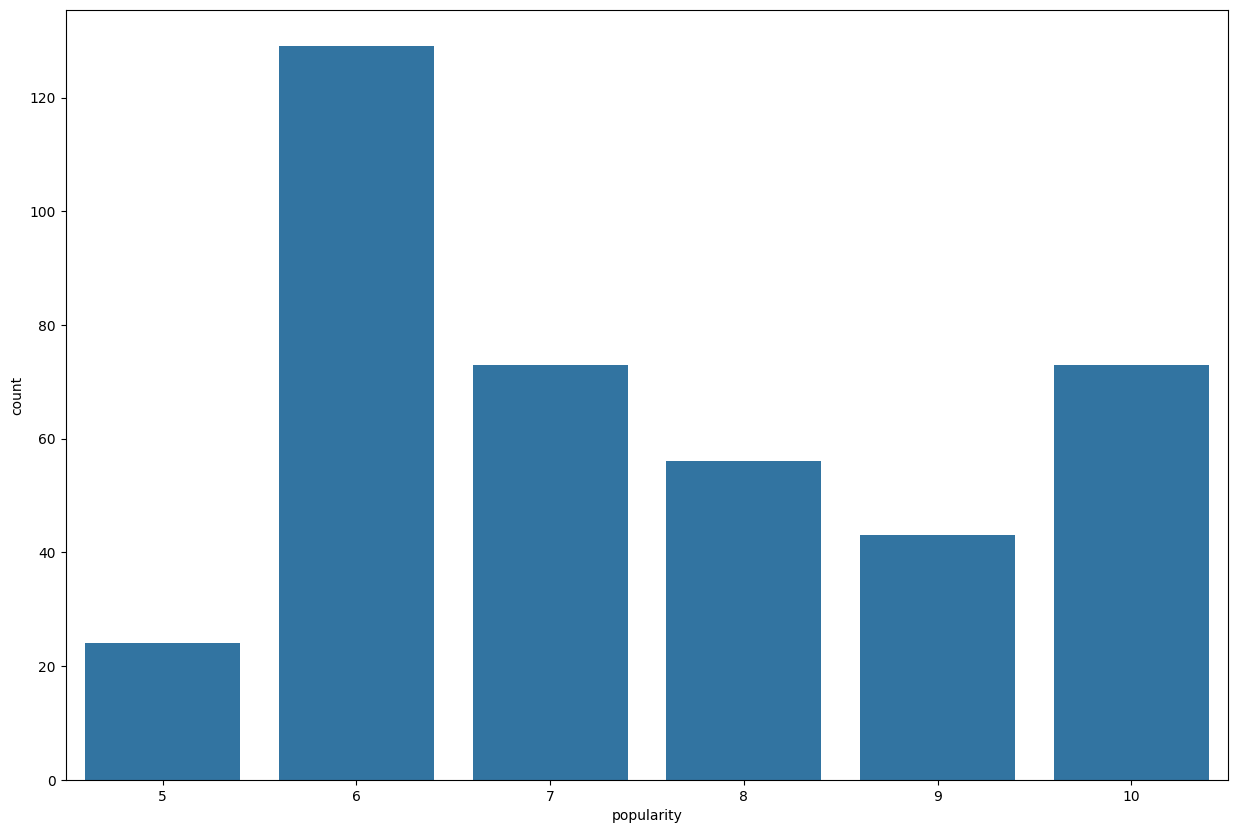

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='popularity')
#from the below graph,the popularity '6' has the highest count.

<Axes: xlabel='popularity', ylabel='count'>

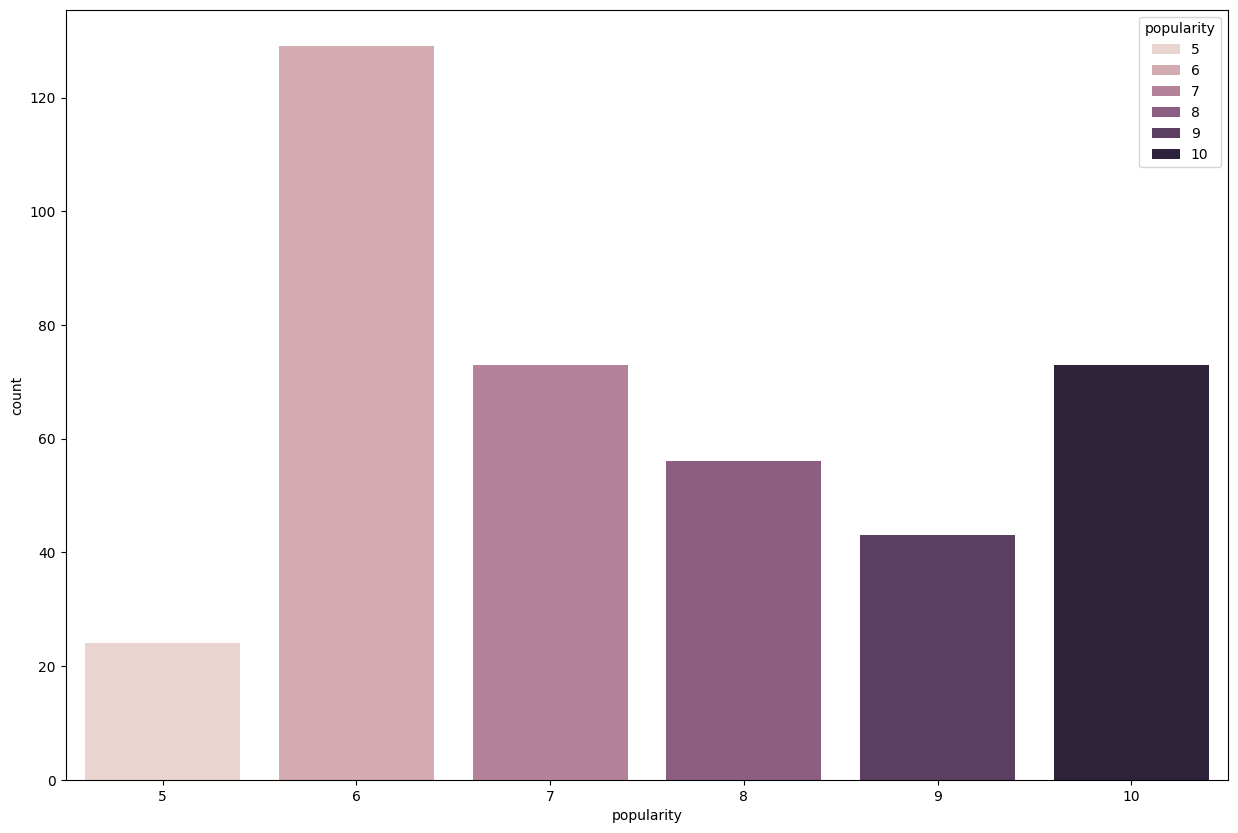

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='popularity', hue='popularity')

**DATA PREPROCESSING**

**HANDLING CATEGORICAL FEATURES**

In [24]:
lyrics_train=train_data.drop('popularity',axis=1)
lyrics_labels=train_data[['popularity']]

***Let's create a pipeline to encode all features in the training input data***

In [33]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe=Pipeline([('ord_enc',OrdinalEncoder())])
lyrics_train_prepared=pipe.fit_transform(lyrics_train)

***Let's also handle labels.labels contain P and N, so we want to convert those into numbers.Here instead of using Ordinary Encoder,we will use label encoder.sklearn is explicity that it is used to encode target features.***

In [34]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
lyrics_labels_prepared=label_enc.fit_transform(lyrics_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**TRAIN DECISION TREE CLASSIFIER**

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(lyrics_train_prepared,lyrics_labels_prepared)

DecisionTreeClassifier()

**EVALUATING DECISIONS TREES**

***Let's build 2 functions to display confusion matrix,and classification report.Classification report contains all useful matrics such as precision,recall and f1 score***

**CONFUSION MATRIX**

In [28]:
from sklearn.metrics import confusion_matrix
def conf_matrix(input_data,model,labels):
  """
  Take the input data,model and labels and return confusion matrix
  """
  preds=model.predict(input_data)
  cm=confusion_matrix(labels,preds)

  return cm

In [31]:
conf_matrix(lyrics_train_prepared,tree_clf,lyrics_labels_prepared)

array([[ 24,   0,   0,   0,   0,   0],
       [  0, 129,   0,   0,   0,   0],
       [  0,   0,  73,   0,   0,   0],
       [  0,   0,   0,  56,   0,   0],
       [  0,   0,   0,   0,  43,   0],
       [  0,   0,   0,   0,   0,  73]])

**CLASSIFICATION REPORT**

In [29]:
from sklearn.metrics import classification_report
def class_report(input_data,model,labels):
  """
  Take the input data,model and labels and return classification report
  """
  preds=model.predict(input_data)
  report=classification_report(labels,preds)
  report=print(report)

  return report

In [30]:
class_report(lyrics_train_prepared,tree_clf,lyrics_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00        73

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

